# Mayo Classification with BEiT 

* Hyperparameter tuning was done using wandb 
* View project at https://wandb.ai/bevandenizcilgin/di725_project

In [ ]:
!pip install wandb

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader,Subset
from torchvision import datasets, transforms
import torchvision.models as models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from transformers import  BeitImageProcessor

# Image data directories
train_dir = '/content/drive/MyDrive/train_and_validation_sets'  # Replace with actual path
test_dir = '/content/drive/MyDrive/test_set'  # Replace with actual path


In [ ]:
processor = BeitImageProcessor.from_pretrained('microsoft/beit-base-patch16-224')

# Transformations for training data
train_transforms = transforms.Compose([
    transforms.Resize(256),  # Resize to a larger size
    transforms.RandomResizedCrop(224),  # Randomly crop to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean= processor.image_mean, std=processor.image_std)  # Normalize based on BeitImageProcessor
])

# Transformations for validation and test data
val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean= processor.image_mean, std=processor.image_std) # Normalize based on BeitImageProcessor
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_transforms)

# Get class labels from the dataset
labels = train_dataset.targets

# Split train dataset to train and validation  
val_split = 0.2
class_counts = [labels.count(i) for i in set(labels)]
val_counts = [int(count * val_split) for count in class_counts]

train_indices = []
val_indices = []

for idx, (_, label) in enumerate(train_dataset.samples):
    if class_counts[label] > val_counts[label]:
        train_indices.append(idx)
        class_counts[label] -= 1
    else:
        val_indices.append(idx)

# Samplers will be used for DataLoaders
train_sampler = Subset(train_dataset, train_indices)
val_sampler = Subset(train_dataset, val_indices)

# Class weight calculation
weight = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(train_dataset.targets), y=train_dataset.targets)
class_weights=torch.tensor(weight,dtype=torch.float).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import wandb

wandb.login()

wandb: Currently logged in as: bevandenizcilgin. Use `wandb login --relogin` to force relogin


True

Create sweep with ID: 7zvkmz1y
Sweep URL: https://wandb.ai/bevandenizcilgin/di725_project/sweeps/7zvkmz1y


wandb: Agent Starting Run: bu8svsfc with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	learning_rate: 0.0001


Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 240/240 [02:54<00:00,  1.38it/s]


Epoch:0,Training loss:1.00,Correct Samples:0.59
-----------------------------------------------------------
Epoch:0,Validation loss:1.22,Correct Samples:0.45
-----------------------------------------------------------


100%|██████████| 240/240 [02:52<00:00,  1.39it/s]


Epoch:1,Training loss:0.81,Correct Samples:0.67
-----------------------------------------------------------
Epoch:1,Validation loss:0.70,Correct Samples:0.70
-----------------------------------------------------------


100%|██████████| 240/240 [02:53<00:00,  1.39it/s]


Epoch:2,Training loss:0.75,Correct Samples:0.69
-----------------------------------------------------------
Epoch:2,Validation loss:0.74,Correct Samples:0.65
-----------------------------------------------------------


100%|██████████| 240/240 [02:54<00:00,  1.37it/s]


Epoch:3,Training loss:0.72,Correct Samples:0.70
-----------------------------------------------------------
Epoch:3,Validation loss:0.72,Correct Samples:0.66
-----------------------------------------------------------


100%|██████████| 240/240 [02:56<00:00,  1.36it/s]


Epoch:4,Training loss:0.70,Correct Samples:0.72
-----------------------------------------------------------
Epoch:4,Validation loss:0.61,Correct Samples:0.72
-----------------------------------------------------------


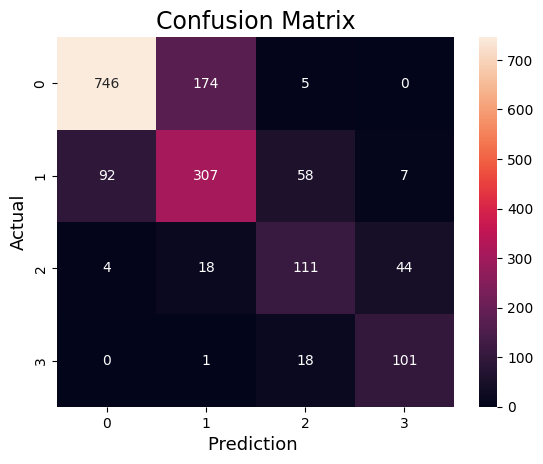

kappa_score,▁
val_accuracy,▁
val_loss,▁
kappa_score,0.84348
val_accuracy,0.71518
val_loss,0.61324


wandb: Agent Starting Run: cy6m6wa1 with config:
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 480/480 [02:58<00:00,  2.69it/s]


Epoch:0,Training loss:1.37,Correct Samples:0.39
-----------------------------------------------------------
Epoch:0,Validation loss:1.31,Correct Samples:0.39
-----------------------------------------------------------


100%|██████████| 480/480 [02:58<00:00,  2.68it/s]


Epoch:1,Training loss:1.25,Correct Samples:0.49
-----------------------------------------------------------
Epoch:1,Validation loss:1.14,Correct Samples:0.48
-----------------------------------------------------------


100%|██████████| 480/480 [02:59<00:00,  2.68it/s]


Epoch:2,Training loss:1.23,Correct Samples:0.50
-----------------------------------------------------------
Epoch:2,Validation loss:1.38,Correct Samples:0.32
-----------------------------------------------------------


100%|██████████| 480/480 [02:58<00:00,  2.68it/s]


Epoch:3,Training loss:1.21,Correct Samples:0.51
-----------------------------------------------------------
Epoch:3,Validation loss:1.08,Correct Samples:0.54
-----------------------------------------------------------


100%|██████████| 480/480 [02:59<00:00,  2.68it/s]


Epoch:4,Training loss:1.19,Correct Samples:0.53
-----------------------------------------------------------
Epoch:4,Validation loss:1.34,Correct Samples:0.39
-----------------------------------------------------------


100%|██████████| 480/480 [02:59<00:00,  2.68it/s]


Epoch:5,Training loss:1.20,Correct Samples:0.52
-----------------------------------------------------------
Epoch:5,Validation loss:1.20,Correct Samples:0.48
-----------------------------------------------------------


100%|██████████| 480/480 [02:59<00:00,  2.68it/s]


Epoch:6,Training loss:1.19,Correct Samples:0.53
-----------------------------------------------------------
Epoch:6,Validation loss:1.20,Correct Samples:0.47
-----------------------------------------------------------


100%|██████████| 480/480 [02:57<00:00,  2.70it/s]


Epoch:7,Training loss:1.18,Correct Samples:0.52
-----------------------------------------------------------
Epoch:7,Validation loss:0.99,Correct Samples:0.58
-----------------------------------------------------------


100%|██████████| 480/480 [02:58<00:00,  2.70it/s]


Epoch:8,Training loss:1.18,Correct Samples:0.54
-----------------------------------------------------------
Epoch:8,Validation loss:1.02,Correct Samples:0.56
-----------------------------------------------------------


100%|██████████| 480/480 [02:58<00:00,  2.69it/s]


Epoch:9,Training loss:1.18,Correct Samples:0.52
-----------------------------------------------------------
Epoch:9,Validation loss:1.06,Correct Samples:0.55
-----------------------------------------------------------


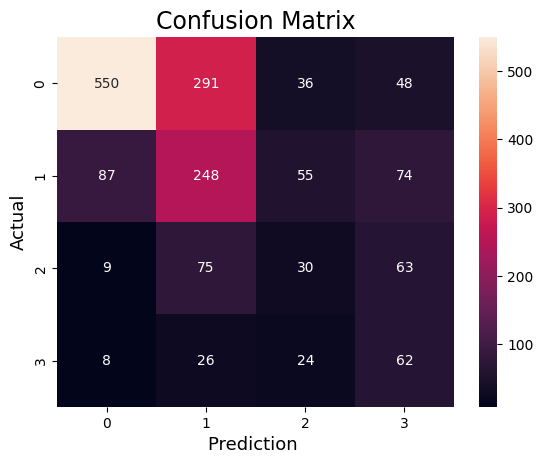

kappa_score,▁
val_accuracy,▁
val_loss,▁
kappa_score,0.50029
val_accuracy,0.55086
val_loss,1.06306


wandb: Agent Starting Run: bgvfnifp with config:
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	learning_rate: 0.0001


Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 480/480 [02:58<00:00,  2.69it/s]


Epoch:0,Training loss:1.06,Correct Samples:0.56
-----------------------------------------------------------
Epoch:0,Validation loss:0.78,Correct Samples:0.65
-----------------------------------------------------------


100%|██████████| 480/480 [02:58<00:00,  2.69it/s]


Epoch:1,Training loss:0.88,Correct Samples:0.64
-----------------------------------------------------------
Epoch:1,Validation loss:0.67,Correct Samples:0.70
-----------------------------------------------------------


100%|██████████| 480/480 [02:59<00:00,  2.68it/s]


Epoch:2,Training loss:0.84,Correct Samples:0.66
-----------------------------------------------------------
Epoch:2,Validation loss:0.73,Correct Samples:0.68
-----------------------------------------------------------


100%|██████████| 480/480 [02:59<00:00,  2.68it/s]


Epoch:3,Training loss:0.82,Correct Samples:0.67
-----------------------------------------------------------
Epoch:3,Validation loss:1.07,Correct Samples:0.51
-----------------------------------------------------------


100%|██████████| 480/480 [02:59<00:00,  2.68it/s]


Epoch:4,Training loss:0.81,Correct Samples:0.68
-----------------------------------------------------------
Epoch:4,Validation loss:0.79,Correct Samples:0.64
-----------------------------------------------------------


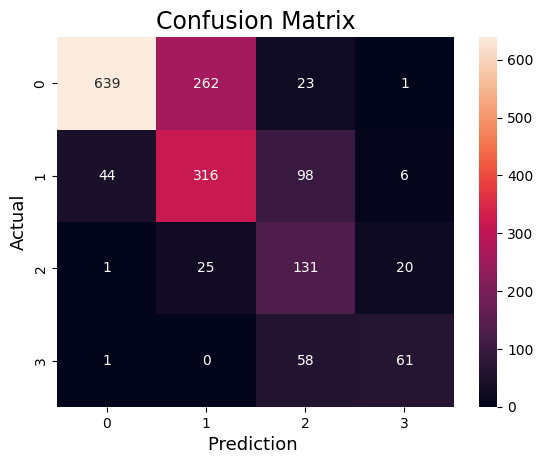

kappa_score,▁
val_accuracy,▁
val_loss,▁
kappa_score,0.77039
val_accuracy,0.63537
val_loss,0.79093


wandb: Agent Starting Run: ylv3a80c with config:
wandb: 	batch_size: 8
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001


Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 960/960 [03:08<00:00,  5.09it/s]


Epoch:0,Training loss:1.38,Correct Samples:0.40
-----------------------------------------------------------
Epoch:0,Validation loss:1.09,Correct Samples:0.56
-----------------------------------------------------------


100%|██████████| 960/960 [03:09<00:00,  5.06it/s]


Epoch:1,Training loss:1.30,Correct Samples:0.48
-----------------------------------------------------------
Epoch:1,Validation loss:1.21,Correct Samples:0.45
-----------------------------------------------------------


100%|██████████| 960/960 [03:09<00:00,  5.06it/s]


Epoch:2,Training loss:1.25,Correct Samples:0.51
-----------------------------------------------------------
Epoch:2,Validation loss:0.98,Correct Samples:0.57
-----------------------------------------------------------


100%|██████████| 960/960 [03:09<00:00,  5.06it/s]


Epoch:3,Training loss:1.24,Correct Samples:0.50
-----------------------------------------------------------
Epoch:3,Validation loss:1.39,Correct Samples:0.32
-----------------------------------------------------------


100%|██████████| 960/960 [03:09<00:00,  5.08it/s]


Epoch:4,Training loss:1.21,Correct Samples:0.53
-----------------------------------------------------------
Epoch:4,Validation loss:1.04,Correct Samples:0.54
-----------------------------------------------------------


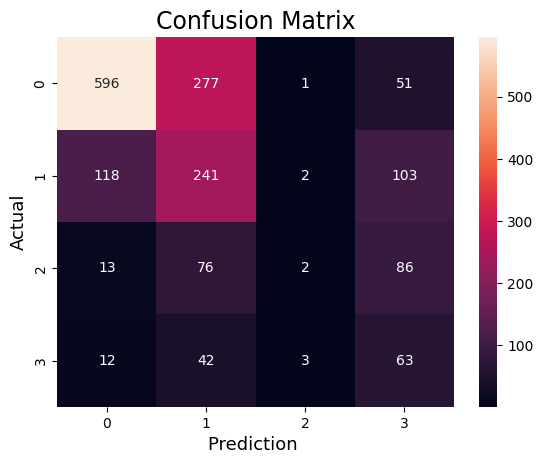

kappa_score,▁
val_accuracy,▁
val_loss,▁
kappa_score,0.49072
val_accuracy,0.54356
val_loss,1.04251


wandb: Agent Starting Run: w7ssa5de with config:
wandb: 	batch_size: 8
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001


Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 960/960 [03:09<00:00,  5.08it/s]


Epoch:0,Training loss:1.30,Correct Samples:0.45
-----------------------------------------------------------
Epoch:0,Validation loss:0.88,Correct Samples:0.62
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.02it/s]


Epoch:1,Training loss:1.09,Correct Samples:0.56
-----------------------------------------------------------
Epoch:1,Validation loss:0.91,Correct Samples:0.61
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.01it/s]


Epoch:2,Training loss:1.03,Correct Samples:0.58
-----------------------------------------------------------
Epoch:2,Validation loss:0.84,Correct Samples:0.61
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.02it/s]


Epoch:3,Training loss:0.97,Correct Samples:0.61
-----------------------------------------------------------
Epoch:3,Validation loss:1.01,Correct Samples:0.53
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.01it/s]


Epoch:4,Training loss:0.92,Correct Samples:0.63
-----------------------------------------------------------
Epoch:4,Validation loss:0.75,Correct Samples:0.67
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.00it/s]


Epoch:5,Training loss:0.90,Correct Samples:0.64
-----------------------------------------------------------
Epoch:5,Validation loss:0.80,Correct Samples:0.63
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.02it/s]


Epoch:6,Training loss:0.89,Correct Samples:0.65
-----------------------------------------------------------
Epoch:6,Validation loss:0.78,Correct Samples:0.64
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.01it/s]


Epoch:7,Training loss:0.86,Correct Samples:0.66
-----------------------------------------------------------
Epoch:7,Validation loss:0.77,Correct Samples:0.66
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.01it/s]


Epoch:8,Training loss:0.83,Correct Samples:0.66
-----------------------------------------------------------
Epoch:8,Validation loss:0.78,Correct Samples:0.65
-----------------------------------------------------------


100%|██████████| 960/960 [03:11<00:00,  5.02it/s]


Epoch:9,Training loss:0.83,Correct Samples:0.67
-----------------------------------------------------------
Epoch:9,Validation loss:0.75,Correct Samples:0.66
-----------------------------------------------------------


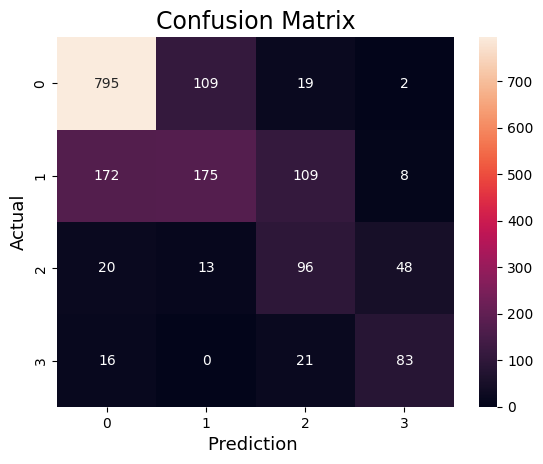

kappa_score,▁
val_accuracy,▁
val_loss,▁
kappa_score,0.73545
val_accuracy,0.65832
val_loss,0.74919


In [ ]:
# Define sweep config
sweep_configuration = {
    "method": "random",
    "name": "sweep",
    "metric": {"goal": "minimize", "name": "val_loss"},
    "parameters": {
        "epochs" : {"values": [5, 10]},
        "batch_size": {"values": [8, 16, 32]},
        "learning_rate": {"values": [0.0001, 0.001]},
    },
}
sweep_id = wandb.sweep(sweep=sweep_configuration, project="di725_project")

# Validation Loop
def validate(model, val_dataloader, criterion):

  model.eval()

  total_loss = 0
  correct = 0
  with torch.no_grad():
    for images, labels in val_dataloader:
      images = images.to(device)
      labels = labels.to(device)

      output = model(images).logits
      loss = criterion(output, labels)

      prediction = output.argmax(dim=1, keepdim=True)
      correct += prediction.eq(labels.view_as(prediction)).sum().item()
      total_loss += loss.item()

  # Calculate average validation loss
  avg_loss = total_loss / len(val_dataloader)

  # Calculate accuracy
  accuracy = correct / len(val_dataloader.dataset)

  return avg_loss, accuracy

def train_and_evaluate():
  import torch
  from torch import nn
  from torchvision import transforms
  from transformers import BeitForImageClassification
  from tqdm import tqdm

  num_classes = 4
  run = wandb.init()

  # Init model
  model = BeitForImageClassification.from_pretrained("microsoft/beit-base-patch16-224",num_labels=num_classes,ignore_mismatched_sizes=True).to(device)

  # Loss function & Optimizer
  criterion = nn.CrossEntropyLoss(weight = class_weights)
  optimizer = torch.optim.Adam(model.parameters(), lr=wandb.config.learning_rate)

  # Dataloaders
  train_loader = DataLoader(train_sampler, batch_size=wandb.config.batch_size, shuffle=True)
  val_loader = DataLoader(val_sampler, batch_size=1, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

  # Train the model
  for epoch in range(wandb.config.epochs):
      # Train loop
      training_loss = 0.0
      training_correct = 0
      model.train()
      for images, labels in tqdm(train_loader):
          images, labels = images.to(device), labels.to(device)

          output = model(images).logits
          loss = criterion(output, labels)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          prediction = output.argmax(dim=1, keepdim=True)
          training_correct += prediction.eq(labels.view_as(prediction)).sum().item()
          training_loss += loss.item()

      training_loss /= len(train_loader)
      training_correct /= len(train_loader.dataset)
      print(f'Epoch:{epoch},Training loss:{training_loss:.2f},Correct Samples:{training_correct:.2f}')
      print('-----------------------------------------------------------')
      # Validation loop
      val_loss, val_accuracy = validate(model, val_loader, criterion)
      print(f'Epoch:{epoch},Validation loss:{val_loss:.2f},Correct Samples:{val_accuracy:.2f}')
      print('-----------------------------------------------------------')

# Evaluation
  model.eval()
  y_true = []
  y_pred = []
  y_probs = []

  # Obtain predicted labels and true labels as a list
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      y_true.append(target.item())

      output = model(data).logits
      y_probs.append(output.softmax(1).tolist()[0])
      prediction = output.argmax(dim=1, keepdim=True)[0][0].item()
      y_pred.append(prediction)

  # Confusion Matrix
  def confusion_matrix(test_labels,preds):# Confusion Matrix
      from sklearn.metrics import confusion_matrix
      import seaborn as sns
      import matplotlib.pyplot as plt

      cm = confusion_matrix(test_labels,preds)
      sns.heatmap(cm,
                  annot=True,
                  fmt='g',
                  xticklabels=['0','1','2','3'],
                  yticklabels=['0','1','2','3'])

      plt.ylabel('Actual',fontsize=13)
      plt.xlabel('Prediction ',fontsize=13)
      plt.title('Confusion Matrix',fontsize=17)
      plt.show()

  # Quadratic Weighted Kappa Score
  from sklearn.metrics import cohen_kappa_score

  kappa_score = cohen_kappa_score(y_true,y_pred,weights = 'quadratic')
  confusion_matrix(y_true,y_pred)

  # Track performance metrics 
  wandb.log({"val_loss": val_loss, "val_accuracy": val_accuracy,"kappa_score":kappa_score})

wandb.agent(sweep_id, function=train_and_evaluate, count=5)